In [11]:
import pandas as pd
import numpy as np 
import dabl
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dfs = pd.read_csv('../data/cleaned_labeled_2021-SB_math_ela_scores.csv' )
dfs['District Name'] = dfs['District Name'].astype(str).str.lower()
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28698 entries, 0 to 28697
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   28698 non-null  int64  
 1   County Code                                  28698 non-null  int64  
 2   District Code                                28698 non-null  int64  
 3   School Code                                  28698 non-null  int64  
 4   Test Year_x                                  28698 non-null  int64  
 5   Student Group ID                             28698 non-null  int64  
 6   Total Tested at Reporting Level              27490 non-null  float64
 7   Total Tested with Scores at Reporting Level  27473 non-null  float64
 8   Grade                                        28698 non-null  int64  
 9   Test ID                                      0 non-null      float64
 10

In [4]:
fte = pd.read_excel('2021_cal_school_FTE_numbers.xlsx',header=6)
fte.rename(columns={'Agency Name':'District Name'},inplace=True)
fte['District Name'] = fte['District Name'].astype(str).str.lower()
fte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   District Name                                                2137 non-null   object 
 1   State Name [District] Latest available year                  2130 non-null   object 
 2   State Name [District] 2020-21                                2130 non-null   object 
 3   Agency ID - NCES Assigned [District] Latest available year   2130 non-null   float64
 4   County Name [District] 2020-21                               2130 non-null   object 
 5   Total Students, All Grades (Excludes AE) [District] 2020-21  2130 non-null   object 
 6   Full-Time Equivalent (FTE) Teachers [District] 2020-21       2130 non-null   object 
 7   Pupil/Teacher Ratio [District] 2020-21                       2130 non-null   ob

In [77]:
lowers[:5]

0                                 abc unified
1            academia avance charter district
2                   academia moderna district
3    academy for academic excellence district
4              academy of media arts district
Name: District Name, dtype: object

In [5]:
## join teacher info and scores 

comdf = dfs.merge(fte, how='inner', on=['District Name'],indicator=True)

In [6]:
comdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24435 entries, 0 to 24434
Data columns (total 46 columns):
 #   Column                                                       Non-Null Count  Dtype   
---  ------                                                       --------------  -----   
 0   Unnamed: 0                                                   24435 non-null  int64   
 1   County Code                                                  24435 non-null  int64   
 2   District Code                                                24435 non-null  int64   
 3   School Code                                                  24435 non-null  int64   
 4   Test Year_x                                                  24435 non-null  int64   
 5   Student Group ID                                             24435 non-null  int64   
 6   Total Tested at Reporting Level                              23274 non-null  float64 
 7   Total Tested with Scores at Reporting Level                  23261 

In [81]:
comdf[[ 'County Name', 'District Name',
       'School Name', 'Zip Code',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21','Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score', '_merge']].sample(4)

,County Name,District Name,School Name,Zip Code,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,Mean Scale Score,_merge
91,Alameda,castro valley unified,Stanton Elementary,94546.0,9203,395.49,23.27,223.0,4,NaN,79.0,75.0,2455.9,both
8615,Madera,golden valley unified,Ranchos Middle,93636.0,2089,96.14,21.73,336.0,8,NaN,173.0,164.0,2513.2,both
17333,San Mateo,south san francisco unified,El Camino High,94080.0,8182,396.2,20.65,147.0,13,NaN,309.0,148.0,NaN,both
11721,Riverside,riverside county office of education,Come Back Kids,92501.0,1444,128.02,11.28,142.0,13,NaN,166.0,143.0,NaN,both


In [47]:
comdf[comdf['School Name']=='River Glen'][[ 'County Name', 'District Name',
       'School Name', 'Zip Code',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21','Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score', '_merge']]

,County Name,District Name,School Name,Zip Code,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,Mean Scale Score,_merge
18432,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,3,NaN,57.0,51.0,2372.2,both
18433,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,4,NaN,59.0,56.0,2424.8,both
18434,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,5,NaN,57.0,55.0,2486.9,both
18435,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,6,NaN,49.0,45.0,2505.5,both
18436,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,7,NaN,37.0,35.0,2579.3,both
18437,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,8,NaN,40.0,31.0,2574.4,both
18438,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,271.0,13,NaN,299.0,273.0,NaN,both
18439,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,273.0,3,NaN,57.0,51.0,2390.2,both
18440,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,273.0,4,NaN,59.0,56.0,2416.4,both
18441,Santa Clara,san jose unified,River Glen,95125.0,27430,1266.08,21.67,273.0,5,NaN,57.0,55.0,2451.7,both


In [49]:
## ok fte has some all caps and and dfs does not , need to convert all to lower to match, good find!

In [7]:
cols =  ['Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']

for i in cols:
    comdf[i] = comdf[i].apply(pd.to_numeric,errors='coerce')
#     c[i] = c[i].astype(float)


In [8]:
comdf[[ 'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']].sample(4)

,"Total Students, All Grades (Excludes AE) [District] 2020-21",Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21
8785,1434.0,67.42,21.27
8736,1860.0,91.00,20.44
17748,15663.0,686.09,22.83
23371,5718.0,247.23,23.13


In [9]:
comdf.to_csv('../data/fte_cleaned_labels.csv')

Target looks like regression


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 6 outliers in column Students Enrolled.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 3 outliers in column Percentage Standard Nearly Met.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 12 outliers in column Pupil/Teacher Ratio [District] 2020-21.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col h

[array([[<AxesSubplot:title={'center':'F=1.34E+04'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.28E+04'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.00E+04'}, xlabel='Grade'>,
         <AxesSubplot:title={'center':'F=9.24E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=5.15E+03'}, xlabel='Percentage Standa...'>],
        [<AxesSubplot:title={'center':'F=3.38E+03'}, xlabel='Students Enrolled', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=2.33E+03'}, xlabel='Students with Scores'>,
         <AxesSubplot:title={'center':'F=2.31E+03'}, xlabel='Students Tested'>,
         <AxesSubplot:title={'center':'F=2.61E+02'}, xlabel='Total Tested with...'>,
         <AxesSubplot:title={'center':'F=2.25E+02'}, xlabel='Total Students, A...'>],
        [<AxesSubplot:title={'center':'F=2.19E+02'}, xlabel='Full-Time Equival...', ylabel='Mean Scale Score'>,
     

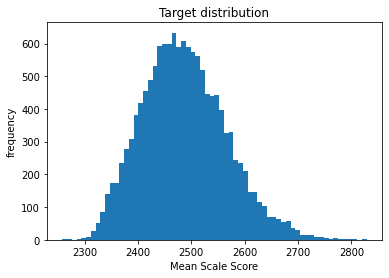

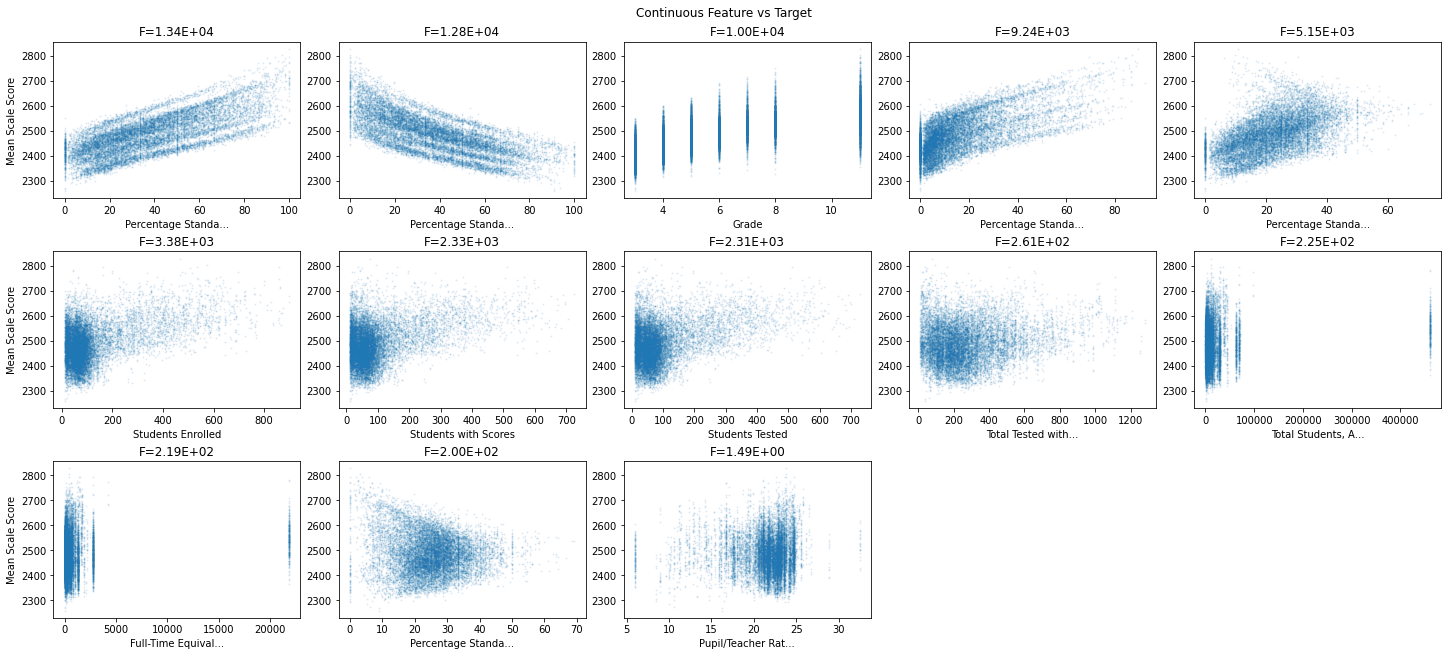

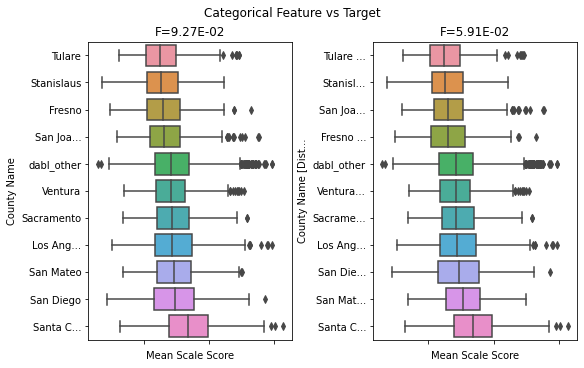

In [12]:
dabl.plot(comdf[[ 
       'Total Tested with Scores at Reporting Level', 'Grade',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'County Name', 'District Name',
       'School Name',
       'County Name [District] 2020-21',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']], target_col='Mean Scale Score')

In [13]:
heat = comdf[[ 
       'Total Tested with Scores at Reporting Level', 'Grade',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'County Name', 'District Name',
       'School Name','Zip Code',
       'County Name [District] 2020-21',
       'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21']]

<AxesSubplot:>

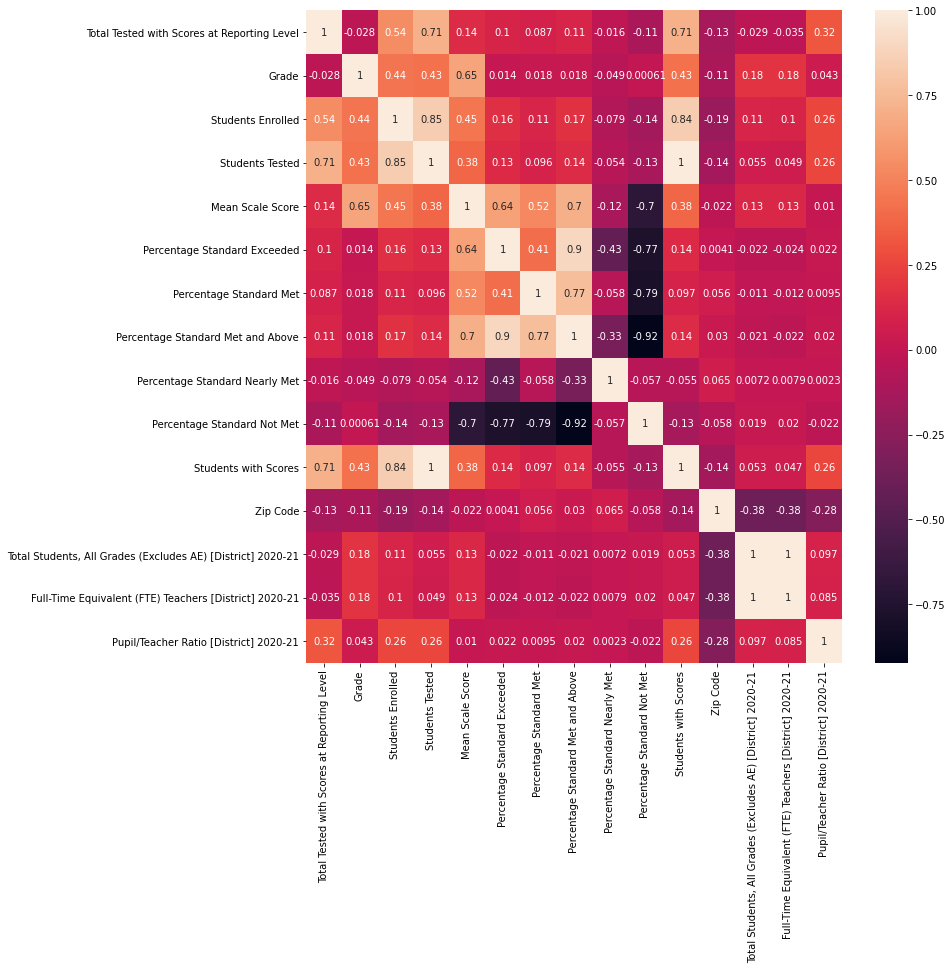

In [14]:

fig ,ax = plt.subplots(figsize=(12,12))

sns.heatmap(heat.corr(),annot=True, ax=ax )
